In [8]:
%matplotlib inline

import os
import numpy as np
from deepsign.rp.index import TrieSignIndex as Index
from deepsign.io.datasets.toefl import TOEFLReader
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.decomposition import PCA
from deepsign.utils.measure import cosine


# model dir
home = os.getenv("HOME")
data_dir = home + "/data/datasets/"
result_dir = home + "/data/results/"
model_dir = result_dir + "nrp/600d_random_init_noreg/"
model_file = model_dir + "model_bnc"
embeddings_file = model_dir + "embeddings.npy"
index_file = model_dir + "index.hdf5"

In [9]:
# load index
index = Index.load(index_file)

In [11]:
# load embeddings
embeddings = np.load(embeddings_file)


def get_vector(word):
    word_ri = index.get_ri(word).to_vector()
    return np.matmul(word_ri, embeddings)

-1.17771
1.18853
(600,)
(2000,)


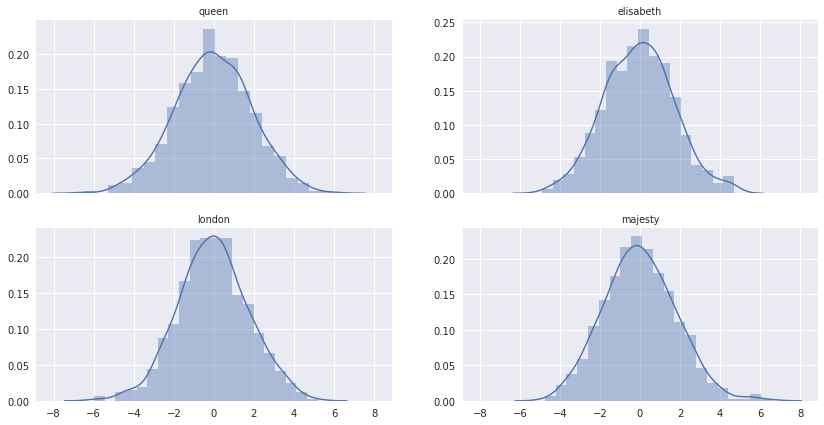

In [12]:
# are the weights healthy?
print(np.min(embeddings))
print(np.max(embeddings))

queen = get_vector("queen")
elisabeth = get_vector("elisabeth")

london = get_vector("london")
majesty = get_vector("majesty")

print(queen.shape)
print(index.get_ri("queen").to_vector().shape)

# setup figure
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(14, 7), sharex=True)
sns.despine(left=True)
sns.set(style="white", context="paper")

sns.distplot(queen,ax=axes[0,0])
axes[0,0].set_title("queen")
sns.distplot(elisabeth,ax=axes[0,1])
axes[0,1].set_title("elisabeth")
sns.distplot(london,ax=axes[1,0])
axes[1,0].set_title("london")
sns.distplot(majesty,ax=axes[1,1])
axes[1,1].set_title("majesty")

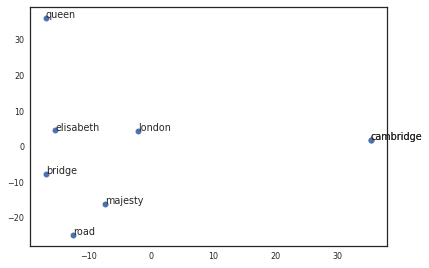

In [14]:
# this is bad depends on the corpus and model
words = [
    "london",
    "cambridge",
    "queen",
    "cambridge",
    "majesty",
    "elisabeth",
    "road",
    "bridge"
]

vectors = np.array([get_vector(w) for w in words])

pca = PCA(n_components=2)
projection = pca.fit(vectors).transform(vectors)


sns.set(style="white", context="paper")
fig, ax = plt.subplots()
plt.scatter(projection[:,0],projection[:,1])

for i,text in enumerate(words):
    ax.annotate(text,(projection[i,0],projection[i,1]))